# `How Can Bellabeat, A Wellness Technology Company Play It Smart?`

 -Priyanka K Gupta

**Google Capstone Project**

The analysis follows the 6 steps of Data Analysis taught in the Google course: Ask, Prepare, Process, Analyse, Share and Act.

# **`Step 1 ASK`**

In this step, we define the problem and objectives of our case study and its desired outcome. 

**`Bellabeat`** is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. 

`Business Objectives`
- What are the `trends` identified?
- How could these trends `apply` to Bellabeat customers?
- How could these trends help `influence` Bellabeat marketing strategy?




# **`Step 2 PREPARE`**

In the Prepare phase, we identify the data being used and its limitations.

- `Data`is publicly available on Kaggle: **FitBit Fitness Tracker Data** and stored in `18` csv files.

- `Tool` **Python** for Data Cleaning,Transformation and Visualisation

# **`Step 3 PROCESS`**

We will process the data by `cleaning` and ensuring that it is correct, relevant, complete and free of error and outlier by performing:

1. Explore and observe data
2. Check for and treat `missing or null` values
3. `Transform` data — format data type
4. Perform preliminary `statistical analysis`

`Preparing Environment`: Load necessary Python libraries.




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

`Import Dataset`

In [4]:
daily_activity=pd.read_csv('/content/dailyActivity_merged.csv')

Data observation

In [5]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [9]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

**Checking for missing/NULL values**

In [11]:
missing_val=daily_activity.isnull().sum()
missing_val

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


---
From the above observations, we note that:
1. Data has 15 columns and 940 rows
2. There are 33 unique IDs
3. There are no NULL or missing values
4. ActivityDate columns is misclassified as `object` dtype and has to be converted to `datetime64` dtype.

In [13]:
#convert ActivityDate from object dtype to datetime64 dtype
daily_activity["ActivityDate"]=pd.to_datetime(daily_activity["ActivityDate"],format="%m/%d/%Y")

In [14]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [15]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Adding new columns
1. `DayOfTheWeek` by generating date in the form of day of the week for further analysis.
2. `TotalExerciseMinutes` being the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes and SedentaryMinutes.
3. `TotalExerciseHours` by converting new column TotalMins to number of hours.

In [16]:
#new columns and re-arranging DayOfTheWeek,TotalExerciseMinutes, TotalExerciseHours
columns=['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 
         'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 
         'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
         'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']
df_activity=daily_activity.reindex(columns=columns)


In [17]:
df_activity.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [18]:
df_activity['DayOfTheWeek']=df_activity['ActivityDate'].dt.day_name()

In [21]:
#`TotalExerciseMinutes` being the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes and SedentaryMinutes.
df_activity['TotalExerciseMinutes']=df_activity['VeryActiveMinutes']+df_activity['FairlyActiveMinutes']+df_activity['LightlyActiveMinutes']+df_activity['SedentaryMinutes']

In [24]:
df_activity['TotalExerciseHours']=round(df_activity['TotalExerciseMinutes']/60)

In [26]:
#review changes made
df_activity.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


# **`Step 4 ANALYSE`**

We analyse data by finding certain statistical values
1. `count` — no. of rows
2. `mean` (average)
3. `std` (standard deviation)
4. `min and max`
5. `percentiles` 25%, 50%, 75%

In [30]:
df_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


`INTERPRETING THE STATISTICAL FINDINGS`
1. On average, users logged **7,637 steps or 5.4km** . As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health. 
2. **Sedentary users** are the majority logging on average **991 minutes or 20 hours making up 81%** of total average minutes.
3. Noting that **average calories burned is 2,303 calories** equivalent to 0.6 pound.

Source:Medical News Today article,Health Line article 

# **`Step 5 SHARE`**

Using visualizations we will communicat our findings based on our analysis.

In [29]:
#ANALYSIS
df_activity['TotalDistance'].describe()

count    940.000000
mean       5.489702
std        3.924606
min        0.000000
25%        2.620000
50%        5.245000
75%        7.712500
max       28.030001
Name: TotalDistance, dtype: float64

**`Frequency of usage across the week`**


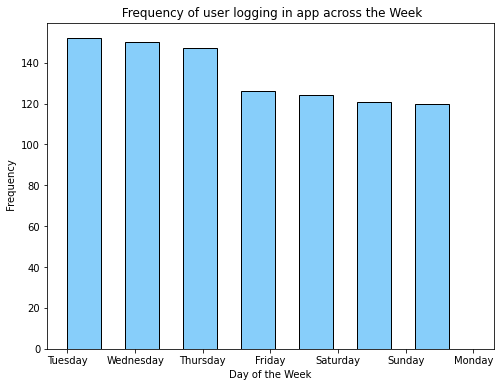

In [35]:
plt.figure(figsize=(8,6))
plt.hist(df_activity.DayOfTheWeek,bins=7,width=0.5,edgecolor='black',color='lightskyblue')
plt.xlabel("Day of the Week")
plt.ylabel(" Frequency")
plt.title(" Frequency of user logging in app across the Week")
plt.show()

**`Frequency of usage across the week`**

In this histogram, we are looking at the frequency of FitBit app usage in terms of days of the week.

- We discovered that users **track their activity** on the app during midweek 

---

from **Tuesday to Friday**.
- The **frequency dropped on Friday and continue on weekends and Monday**.

**`Calories burned for every step taken`**

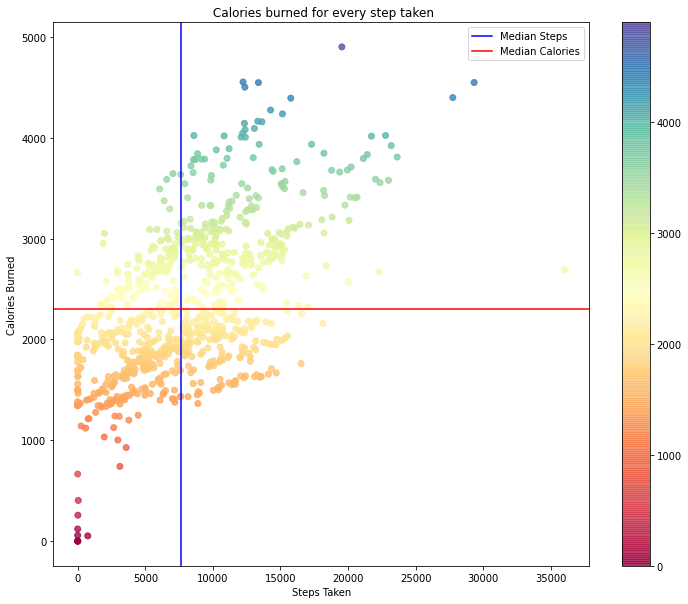

In [40]:
plt.figure(figsize=(12,10))
plt.scatter(df_activity.TotalSteps,df_activity.Calories,alpha=0.8,c=df_activity.Calories,cmap="Spectral")
median_calories=2303
median_steps=7637

plt.colorbar(orientation="vertical")
plt.axvline(median_steps,color="Blue",label="Median Steps")
plt.axhline(median_calories,color="Red",label="Median Calories")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title(" Calories burned for every step taken")
plt.legend()
plt.show()

From the scatter plot, we discovered that:

- It is a **positive correlation.**
- We observed that **intensity of calories burned increase** when users are at the range of **> 0 to 15,000 steps** with calories **burn rate cooling down from 15,000 steps onwards**.

**`Percentage of Activity in Minutes`**

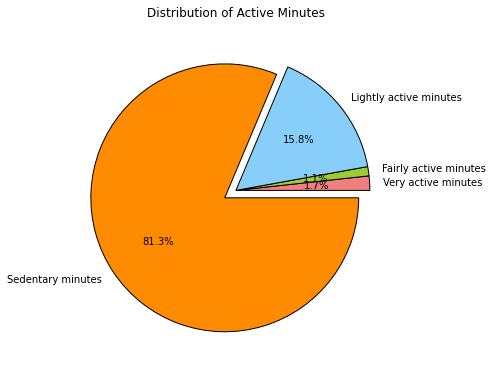

In [45]:
very_active_minutes=df_activity['VeryActiveMinutes'].sum()
fairly_active_minutes=df_activity['FairlyActiveMinutes'].sum()
lightly_active_minutes=df_activity['LightlyActiveMinutes'].sum()
sedentary_minutes=df_activity['SedentaryMinutes'].sum()
slices=[very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colors = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode=[0,0,0,0.1]

plt.figure(figsize=(6,8))
plt.pie(slices,labels=labels,
                colors=colors,
                explode=explode,
                autopct="%1.1f%%",wedgeprops = {"edgecolor": "black"})
plt.title("Distribution of Active Minutes")
plt.show()

**`Percentage of Activity in Minutes`**

As seen from the pie chart,

- **Sedentary** minutes takes the **biggest** slice at 81.3%.
This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements.
- App is **rarely being used to track fitness** (ie. running) as per the minor 

1.   List item
2.   List item

percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.


# **`STEP 6 ACT`**

We share insights and provide recommendations based on our analysis.

Here, we revisit our business questions and share with you our high-level business recommendations.

1. **What are the trends identified?**

- Majority of users**(81.3%)** are using the FitBit app to track **sedentary activities** and not using it for tracking their health habits.
- Users prefer to **track their activities during weekdays** as compared to weekends.

2.**How could these trends help influence Bellabeat marketing strategy?**

- Bellabeat marketing team can encourage users by **educating** them with **knowledge about fitness benefits**, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends).
- On weekends, Bellabeat app can also **prompt notification** to encourage users to exercise.
- Exclusive **monthly events** to encourage participation.